# Python Pandas Library
> Basic Data Manipulation

- toc: true 
- badges: true
- comments: true
- categories: [jupyter]
- image: images/chart-preview.png

<br>

This notebook aims to intrduce users to Pandas library, an useful tool for tabular data manipulation. What it can be done is similar to Excel but allows users to have a much higher flexibility and to manage huge dataset in efficient manner.

<br>

Presumptions: 

https://www.youtube.com/watch?v=vmEHCJofslg&t=2s

https://www.w3schools.com/python/python_dictionaries.asp

<br>




## ***Pandas Series***

We have learnt about list, which is a simple way to handle information but Pandas includes  many extra features to handle data, such as handling **missing data** and **indexing objects with text**. The corresponding form of a list in Pandas is a **Pandas series**, which acts can also be understood as a column of the **Pandas dataframe**. A **Pandas Series** can be created using `pd.Series()`.

In [1]:
import pandas as pd
names = pd.Series(['登江中孤屿，赠白云先生王迥', '秋登兰山寄张五',' ','入峡寄弟'])
names

0    登江中孤屿，赠白云先生王迥
1          秋登兰山寄张五
2                 
3             入峡寄弟
dtype: object

Nearly all Python's built-in string methods are mirrored by a Pandas vectorized string method. Here is a list of Pandas ``str`` methods:

|             |                  |                  |                  |
|-------------|------------------|------------------|------------------|
|``len()``    | ``lower()``      | ``translate()``  | ``islower()``    | 
|``ljust()``  | ``upper()``      | ``startswith()`` | ``isupper()``    | 
|``rjust()``  | ``find()``       | ``endswith()``   | ``isnumeric()``  | 
|``center()`` | ``rfind()``      | ``isalnum()``    | ``isdecimal()``  | 
|``zfill()``  | ``index()``      | ``isalpha()``    | ``split()``      | 
|``strip()``  | ``rindex()``     | ``isdigit()``    | ``rsplit()``     | 
|``rstrip()`` | ``capitalize()`` | ``isspace()``    | ``partition()``  | 
|``lstrip()`` |  ``swapcase()``  |  ``istitle()``   | ``rpartition()`` |

We need to pay attention that although many of the strings method is not applicable in Chinese languages, some functions can still be really helpful.

For example, 

In [2]:
names.str.startswith('秋') # looking for item that start with a character

0    False
1     True
2    False
3    False
dtype: bool

In [3]:
names.str.isspace() # looking for empty space

0    False
1    False
2     True
3    False
dtype: bool

In [4]:
names.str.find('秋') # look for where (index) is a character

0   -1
1    0
2   -1
3   -1
dtype: int64

In [5]:
names.str.split(pat="") # split characters

0    [, 登, 江, 中, 孤, 屿, ，, 赠, 白, 云, 先, 生, 王, 迥, ]
1                      [, 秋, 登, 兰, 山, 寄, 张, 五, ]
2                                        [,  , ]
3                               [, 入, 峡, 寄, 弟, ]
dtype: object

In [6]:
names.str.extract('([A-Za-z]+)', expand=False) # look for letters (this is called regular expression, you will learn about it later)

0    NaN
1    NaN
2    NaN
3    NaN
dtype: object

In [7]:
names.str.findall(r'^[秋].*$') # find item with characters

0           []
1    [秋登兰山寄张五]
2           []
3           []
dtype: object

There are also some methods that allows convenient operations:

| Method | Description |
|--------|-------------|
| ``get()`` | Index each element |
| ``slice()`` | Slice each element|
| ``slice_replace()`` | Replace slice in each element with passed value|
| ``cat()``      | Concatenate strings|
| ``repeat()`` | Repeat values |
| ``normalize()`` | Return Unicode form of string |
| ``pad()`` | Add whitespace to left, right, or both sides of strings|
| ``wrap()`` | Split long strings into lines with length less than a given width|
| ``join()`` | Join strings in each element of the Series with passed separator|
| ``get_dummies()`` | extract dummy variables as a dataframe |

In [8]:
names.str[0:1] # get the first character only

0    登
1    秋
2     
3    入
dtype: object

In [9]:
names.str.split(pat='，').str.get(0) # get first clause

0      登江中孤屿
1    秋登兰山寄张五
2           
3       入峡寄弟
dtype: object

We can even get some statistics about the length of our text using `describe()`.

In [10]:
names.str.len().describe()

count     4.000000
mean      6.250000
std       5.123475
min       1.000000
25%       3.250000
50%       5.500000
75%       8.500000
max      13.000000
dtype: float64

We can also create a Pandas DataFrame from a **dictionary**: while the **keys** will be used as the name of the column in the **Pandas DataFrame**, the **values** will be used as the data (rows).

Let's build a data frame using [**capital**](https://en.wikipedia.org/wiki/Historical_capitals_of_China) names for Qin and Han dynasties as an example.

In [11]:
dictionary = {
    'Time': ['','– 677 BC','677 BC –','– 383 BC','383 BC – 250 BC','350 BC – 207 BC','202 BC','202 BC – 200 BC','200 BC – 8 BC'],
    'Dynasty': ['Qin','Qin','Qin','Qin','Qin','Qin','Han','Han','Han'], 
    'Capital': ['Xiquanqiu','Pingyang','Yong','Jingyang','Yueyang','Xianyang','Luoyang','Yueyang','Changan']
     } # remember all column in the data frame have to have the same length

df = pd.DataFrame(data=dictionary) # use pd.DataFrame() and put the dict as an argument
df

,Time,Dynasty,Capital
0,,Qin,Xiquanqiu
1,– 677 BC,Qin,Pingyang
2,677 BC –,Qin,Yong
3,– 383 BC,Qin,Jingyang
4,383 BC – 250 BC,Qin,Yueyang
5,350 BC – 207 BC,Qin,Xianyang
6,202 BC,Han,Luoyang
7,202 BC – 200 BC,Han,Yueyang
8,200 BC – 8 BC,Han,Changan


In [12]:
df = df.set_index('Time') # we can also set text as index
df

,Dynasty,Capital
Time,,
,Qin,Xiquanqiu
– 677 BC,Qin,Pingyang
677 BC –,Qin,Yong
– 383 BC,Qin,Jingyang
383 BC – 250 BC,Qin,Yueyang
350 BC – 207 BC,Qin,Xianyang
202 BC,Han,Luoyang
202 BC – 200 BC,Han,Yueyang
200 BC – 8 BC,Han,Changan


To view only the first row:

In [13]:
df.head(1)

,Dynasty,Capital
Time,,
,Qin,Xiquanqiu


To view only the last row:

In [14]:
df.tail(1)

,Dynasty,Capital
Time,,
200 BC – 8 BC,Han,Changan


In order to understand better the group characteristics, we can also use the **groupby** option. It is used with a **groupby()** following with a [**method()**](https://pandas.pydata.org/docs/reference/groupby.html).

For example, we can use **groupby("Dynasty").count()** to count number of rows (number of capital) in each dynasty.

<br>

**Remarks:** Index cannot be used as the groupby object.

In [15]:
df.groupby("Dynasty").count()

,Capital
Dynasty,
Han,3
Qin,6


***

<br>

## **Data Manipulation**

<br>

After understanding what is a **Pandas Series** and what is a **Pandas DataFrame**, we can start with some basic manipulation using a data frame. 
Let's start with an example to build a Pandas dataframe from a text file.

First, we upload a text and selected **titles.txt** file. (can be found in the **data** folder)

In [18]:
from google.colab import files
uploaded = files.upload()

for f in uploaded.keys():
    file = open(f, 'r')
    titles = file.read()

Saving titles.txt to titles (1).txt


Then, we can split the text into **paragraphs** (separate by two new lines) and **sentence** (separate by one new line).

In [19]:
titles = titles.split("\n\n") # two new lines
titles = [lines.split('\n') for lines in titles] # one new line, done in a list comprehension

In [20]:
titles[0:2] # check the first two items we have: 卷159_1 and 卷159_2

[['卷159_1 「从张丞相游南纪城猎，戏赠裴迪张参军」孟浩然',
  '\u3000\u3000从禽非吾乐，不好云梦田。岁暮登城望，偏令乡思悬。',
  '\u3000\u3000公卿有几几，车骑何翩翩。世禄金张贵，官曹幕府贤。',
  '\u3000\u3000顺时行杀气，飞刃争割鲜。十里届宾馆，征声匝妓筵。',
  '\u3000\u3000高标回落日，平楚散芳烟。何意狂歌客，从公亦在旃。'],
 ['卷159_2 「登江中孤屿，赠白云先生王迥」孟浩然',
  '\u3000\u3000悠悠清江水，水落沙屿出。回潭石下深，绿筱岸傍密。',
  '\u3000\u3000鲛人潜不见，渔父歌自逸。忆与君别时，泛舟如昨日。',
  '\u3000\u3000夕阳开返照，中坐兴非一。南望鹿门山，归来恨如失。']]

We can also check how many titles (卷) are there:

In [21]:
len(titles)

269

Then construct our dataframe.

In [22]:
import pandas as pd # In case library is not imported

df = pd.DataFrame({"content": titles}) # construct a data frame using a dictionary
df.head()

,content
0,"[卷159_1 「从张丞相游南纪城猎，戏赠裴迪张参军」孟浩然, 从禽非吾乐，不好云梦田。..."
1,"[卷159_2 「登江中孤屿，赠白云先生王迥」孟浩然, 悠悠清江水，水落沙屿出。回潭石下..."
2,"[卷159_3 「晚春卧病寄张八」孟浩然, 南陌春将晚，北窗犹卧病。林园久不游，草木一何..."
3,"[卷159_4 「秋登兰山寄张五」孟浩然, 北山白云里，隐者自怡悦。相望试登高，心飞逐鸟..."
4,"[卷159_5 「入峡寄弟」孟浩然, 吾昔与尔辈，读书常闭门。未尝冒湍险，岂顾垂堂言。,..."


We realize the content column is so messy as it contains different information such as which titles, author name and the content itself. So we want to set up different new columns:

<br>

**1) title: The title**

**2) content: The text**

**3) index: use the text id (eg. 159_1) as index**

We can set up new columns by simply writing 

**df["name of the new column"] = [what we plan to put in]**

What we plan to put in can be for example, a Numpy array with the same length, or just a number (in this case all rows will have the same value). For example,

In [23]:
import numpy as np
df["test"] = 1

df.head()

,content,test
0,"[卷159_1 「从张丞相游南纪城猎，戏赠裴迪张参军」孟浩然, 从禽非吾乐，不好云梦田。...",1
1,"[卷159_2 「登江中孤屿，赠白云先生王迥」孟浩然, 悠悠清江水，水落沙屿出。回潭石下...",1
2,"[卷159_3 「晚春卧病寄张八」孟浩然, 南陌春将晚，北窗犹卧病。林园久不游，草木一何...",1
3,"[卷159_4 「秋登兰山寄张五」孟浩然, 北山白云里，隐者自怡悦。相望试登高，心飞逐鸟...",1
4,"[卷159_5 「入峡寄弟」孟浩然, 吾昔与尔辈，读书常闭门。未尝冒湍险，岂顾垂堂言。,...",1


Or this:

In [24]:
df["test"] = np.arange(0,269)

df.head()

,content,test
0,"[卷159_1 「从张丞相游南纪城猎，戏赠裴迪张参军」孟浩然, 从禽非吾乐，不好云梦田。...",0
1,"[卷159_2 「登江中孤屿，赠白云先生王迥」孟浩然, 悠悠清江水，水落沙屿出。回潭石下...",1
2,"[卷159_3 「晚春卧病寄张八」孟浩然, 南陌春将晚，北窗犹卧病。林园久不游，草木一何...",2
3,"[卷159_4 「秋登兰山寄张五」孟浩然, 北山白云里，隐者自怡悦。相望试登高，心飞逐鸟...",3
4,"[卷159_5 「入峡寄弟」孟浩然, 吾昔与尔辈，读书常闭门。未尝冒湍险，岂顾垂堂言。,...",4


We can also add a new row:

In [25]:
df.append({'content': np.nan, 'test': np.nan}, ignore_index=True) # This is temporary only and will not change the data frame itself

# np.nan means missing values

,content,test
0,"[卷159_1 「从张丞相游南纪城猎，戏赠裴迪张参军」孟浩然, 从禽非吾乐，不好云梦田。...",0.0
1,"[卷159_2 「登江中孤屿，赠白云先生王迥」孟浩然, 悠悠清江水，水落沙屿出。回潭石下...",1.0
2,"[卷159_3 「晚春卧病寄张八」孟浩然, 南陌春将晚，北窗犹卧病。林园久不游，草木一何...",2.0
3,"[卷159_4 「秋登兰山寄张五」孟浩然, 北山白云里，隐者自怡悦。相望试登高，心飞逐鸟...",3.0
4,"[卷159_5 「入峡寄弟」孟浩然, 吾昔与尔辈，读书常闭门。未尝冒湍险，岂顾垂堂言。,...",4.0
...,...,...
265,"[卷160_181 「渡浙江问舟中人（一题作济江问同舟人。一作崔国辅诗）」孟浩然, 潮落...",265.0
266,"[卷160_182 「初秋」孟浩然, 不觉初秋夜渐长，清风习习重凄凉。, 炎炎暑退茅...",266.0
267,"[卷160_183 「过融上人兰若」孟浩然, 山头禅室挂僧衣，窗外无人水鸟飞。, 黄...",267.0
268,"[卷160_184 「句」孟浩然, 微云淡河汉，疏雨滴梧桐。, 逐逐怀良驭，萧萧顾乐...",268.0


In [26]:
df = df.append({'content': np.nan, 'test': np.nan}, ignore_index=True) # df =  <- now the df is replaced

df.tail(1)

,content,test
269,NaN,NaN


We can then drop the row (all missing values) and the column again.

In [27]:
df = df.dropna(how="any",axis="index") # this is for dropping all missing values in the rows

df.tail(1)

,content,test
268,"[卷160_184 「句」孟浩然, 微云淡河汉，疏雨滴梧桐。, 逐逐怀良驭，萧萧顾乐...",268.0


In [28]:
df = df.drop(columns="test") # this is dropping the column named "test"

df.head()

,content
0,"[卷159_1 「从张丞相游南纪城猎，戏赠裴迪张参军」孟浩然, 从禽非吾乐，不好云梦田。..."
1,"[卷159_2 「登江中孤屿，赠白云先生王迥」孟浩然, 悠悠清江水，水落沙屿出。回潭石下..."
2,"[卷159_3 「晚春卧病寄张八」孟浩然, 南陌春将晚，北窗犹卧病。林园久不游，草木一何..."
3,"[卷159_4 「秋登兰山寄张五」孟浩然, 北山白云里，隐者自怡悦。相望试登高，心飞逐鸟..."
4,"[卷159_5 「入峡寄弟」孟浩然, 吾昔与尔辈，读书常闭门。未尝冒湍险，岂顾垂堂言。,..."


Now we finally start with our new columns:

Let's look at one of our data: we can see the first item is the id, title and author name, and the other items are the text. So let's set the first item as title, and the rest of the items as content.

In [29]:
df["content"][0]

['卷159_1 「从张丞相游南纪城猎，戏赠裴迪张参军」孟浩然',
 '\u3000\u3000从禽非吾乐，不好云梦田。岁暮登城望，偏令乡思悬。',
 '\u3000\u3000公卿有几几，车骑何翩翩。世禄金张贵，官曹幕府贤。',
 '\u3000\u3000顺时行杀气，飞刃争割鲜。十里届宾馆，征声匝妓筵。',
 '\u3000\u3000高标回落日，平楚散芳烟。何意狂歌客，从公亦在旃。']

In [30]:
df["title"] = df["content"].str[0] # the first item
df["content"] = df["content"].str[1:] # second to last item
df["content"] = df["content"].str.get(0) # get rid of the [] by extracting the first item from list
df.head()

,content,title
0,从禽非吾乐，不好云梦田。岁暮登城望，偏令乡思悬。,卷159_1 「从张丞相游南纪城猎，戏赠裴迪张参军」孟浩然
1,悠悠清江水，水落沙屿出。回潭石下深，绿筱岸傍密。,卷159_2 「登江中孤屿，赠白云先生王迥」孟浩然
2,南陌春将晚，北窗犹卧病。林园久不游，草木一何盛。,卷159_3 「晚春卧病寄张八」孟浩然
3,北山白云里，隐者自怡悦。相望试登高，心飞逐鸟灭。,卷159_4 「秋登兰山寄张五」孟浩然
4,吾昔与尔辈，读书常闭门。未尝冒湍险，岂顾垂堂言。,卷159_5 「入峡寄弟」孟浩然


In [31]:
df = df.replace(r'\n',' ', regex=True)  # replace the next line symbol '\n' with empty space
df.head()

,content,title
0,从禽非吾乐，不好云梦田。岁暮登城望，偏令乡思悬。,卷159_1 「从张丞相游南纪城猎，戏赠裴迪张参军」孟浩然
1,悠悠清江水，水落沙屿出。回潭石下深，绿筱岸傍密。,卷159_2 「登江中孤屿，赠白云先生王迥」孟浩然
2,南陌春将晚，北窗犹卧病。林园久不游，草木一何盛。,卷159_3 「晚春卧病寄张八」孟浩然
3,北山白云里，隐者自怡悦。相望试登高，心飞逐鸟灭。,卷159_4 「秋登兰山寄张五」孟浩然
4,吾昔与尔辈，读书常闭门。未尝冒湍险，岂顾垂堂言。,卷159_5 「入峡寄弟」孟浩然


In [32]:
type(df.title[0]) # title is type of string

str

Now we can set up a new column "id" and then use it as our index using **set_index()**.

We learnt in the last notebook. **(\d+_\d+)** means numbers followed by _ followed by numbers again. This is the pattern used for extract from the title column.

In [33]:
df["id"] = df.title.str.extract('(\d+_\d+)')
df = df.set_index("id")

df.head()

,content,title
id,,
159_1,从禽非吾乐，不好云梦田。岁暮登城望，偏令乡思悬。,卷159_1 「从张丞相游南纪城猎，戏赠裴迪张参军」孟浩然
159_2,悠悠清江水，水落沙屿出。回潭石下深，绿筱岸傍密。,卷159_2 「登江中孤屿，赠白云先生王迥」孟浩然
159_3,南陌春将晚，北窗犹卧病。林园久不游，草木一何盛。,卷159_3 「晚春卧病寄张八」孟浩然
159_4,北山白云里，隐者自怡悦。相望试登高，心飞逐鸟灭。,卷159_4 「秋登兰山寄张五」孟浩然
159_5,吾昔与尔辈，读书常闭门。未尝冒湍险，岂顾垂堂言。,卷159_5 「入峡寄弟」孟浩然


Now our data frame looks better. But we still want to get rid of the id, author name, and 「」. To remove them, we replace them with a string of nothing (""). Save them back to title column.

In [34]:
df['title'] = df['title'].str.replace('卷(\d+_\d+)', '').str.replace('孟浩然', '')
df['title'] = df['title'].str.replace('「', '').str.replace('」', '')

Let's have our df2 now by coping "title" and "content" from our df. And set index using index from df.

In [35]:
df2 = (df[['title','content']]).set_index(df.index)
df2.head()

,title,content
id,,
159_1,从张丞相游南纪城猎，戏赠裴迪张参军,从禽非吾乐，不好云梦田。岁暮登城望，偏令乡思悬。
159_2,登江中孤屿，赠白云先生王迥,悠悠清江水，水落沙屿出。回潭石下深，绿筱岸傍密。
159_3,晚春卧病寄张八,南陌春将晚，北窗犹卧病。林园久不游，草木一何盛。
159_4,秋登兰山寄张五,北山白云里，隐者自怡悦。相望试登高，心飞逐鸟灭。
159_5,入峡寄弟,吾昔与尔辈，读书常闭门。未尝冒湍险，岂顾垂堂言。


Finally, we also need to know that conversion between Pandas column and Numpy array is very simple. We can basically call the column and **.values**. Then we get our array.

For example, we try to convert our title column to array.

In [71]:
df2.title.values[:5] # first 5 items

array([' 从张丞相游南纪城猎，戏赠裴迪张参军', ' 登江中孤屿，赠白云先生王迥', ' 晚春卧病寄张八', ' 秋登兰山寄张五',
       ' 入峡寄弟'], dtype=object)

***

<br>

## **Data Analysis**

After performing some basic processing of our data, let's try to do some analysis based on what we have. Let's say, we want to understand how the key words of season have been used in the text. How many times have they been used and how are they distributed? At the end we want to use the results to make a bar chart and a dispersion plot using matplotlib. We will learn much more about visualization later, but we now we will stick with the simple plots.

In case we still have rows with missing values, we use **dropna()** again to clean our data frame.

In [36]:
df2 = df2.dropna(how="any",axis="index") # this is for dropping all missing values in the rows

Then we calculate the word offset. It is done by geting the length of strings in the content column (**.len()**) and calculate the cumulative sum of it (**.cumsum()**). It means that now the values in the rows is not the length of the one title, but the word offset starting from the first character of the first title. We use it as our word offset for the plot later. With (**.to_numpy()**) we get the list to numpy array.

In [37]:
word_count = df2.content.str.len().cumsum().to_numpy()

word_count[:5]

array([ 26,  52,  78, 104, 130])

Now we want to look for the keywords for every season. We do it using the **find()** function and convert the list to numpy. The same apply to every season.

In [38]:
spring_count = df2.content.str.find('春').to_numpy() # for spring

spring_count[:5]

array([-1, -1,  4, -1, -1])

In [39]:
summer_count = df2.content.str.find('夏').to_numpy() # for summer

summer_count[:5]

array([-1, -1, -1, -1, -1])

In [40]:
autumn_count = df2.content.str.find('秋').to_numpy() # for autumn

autumn_count[:5]

array([-1, -1, -1, -1, -1])

In [41]:
winter_count = df2.content.str.find('冬').to_numpy() # for winter
winter_count[:5]

array([-1, -1, -1, -1, -1])

Then, we use **list comprehension** and **enumerate()** to loop through all items and the index in the array, and save (**index + word offset**) that is not equal to one.

The value that printed out can be understood as the **total word offset** of that character starting from the first title. For example, from the next cell we can tell "春" appears in the 82th, 198th, 660th, ... characters.

In [42]:
spring_occur = np.array([v + word_count[i] for i, v in enumerate(spring_count) if v != -1]) # for spring
spring_occur

array([  82,  198,  660,  826, 1094, 1690, 1749, 2077, 2177, 2183, 2333,
       2781, 2853, 3302, 3681, 4091, 4249, 4321, 4351, 5190, 5259, 5297,
       5765, 5902, 6065, 6523, 6571, 6805, 6821])

In [43]:
summer_occur = np.array([v + word_count[i] for i, v in enumerate(summer_count) if v != -1]) # for summer
summer_occur

array([ 407, 3204, 3897])

In [44]:
autumn_occur = np.array([v + word_count[i] for i, v in enumerate(autumn_count) if v != -1]) # for autumn
autumn_occur

array([ 366, 1949, 2347, 3455, 3743, 5504, 5649, 6850])

In [45]:
winter_occur = np.array([v + word_count[i] for i, v in enumerate(winter_count) if v != -1]) # for winter
winter_occur

array([], dtype=float64)

***

<br>

## **Basic Data Visualization**

Afterwards, we have our arrays which store information about the occurences of season keywords. We can make a plot out of it using **matplotlib**. The dispersion plot we are making is based on scatter plot. We will thus do a scatter plot for every season with custom marker styles.

Text(0.5, 1.0, 'Lexical Dispersion')

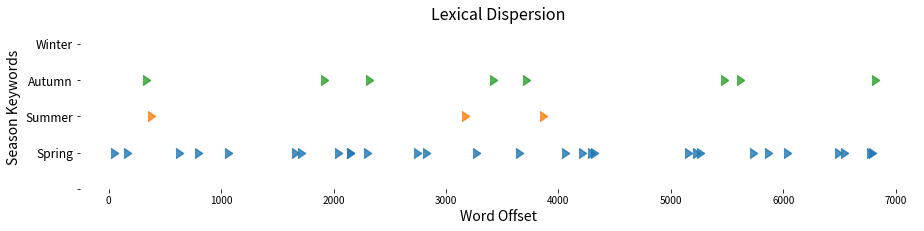

In [68]:
import matplotlib.pyplot as plt # import library

fig, ax = plt.subplots(figsize=(15,3)) # create an empty plot with defined size

# in the scatter plot function (plt.scatter()), we need X for 1st argument and Y for 2nd argument.
# for X we will put the word offset values for keyword occurence, for Y we will put a constant value from 1 to 4
# because we want the same season in the same row

# np.ones() creates 1 with defined shape, in this case the shape is [length of X,1]
spring_y = 1*np.ones([len(spring_occur),1]) # all 1 (1*1)
summer_y = 2*np.ones([len(summer_occur),1]) # all 2 (2*1)
autumn_y = 3*np.ones([len(autumn_occur),1]) # all 3 (3*1)
winter_y = 4*np.ones([len(winter_occur),1]) # all 4 (4*1)

# scatter plot                
plt.scatter(spring_occur,spring_y, marker=5, s=100, alpha=0.8) # first scatter plot for spring, alpha is transparency of the markers
plt.scatter(summer_occur,summer_y, marker=5, s=100, alpha=0.8) # for summer
plt.scatter(autumn_occur,autumn_y, marker=5, s=100, alpha=0.8) # for autumn
plt.scatter(winter_occur,winter_y, marker=5, s=100, alpha=0.8) # for winter

# set y limits
plt.ylim(0.8, 4.5)

# we want our y labels as text, not number. so here we define them.
plt.yticks(np.arange(0,5,1))
labels = ['','Spring', 'Summer', 'Autumn', 'Winter']
ax.set_yticklabels(labels, fontsize=12)

# no plot frame is needed
plt.box(False)

# labels and title
plt.xlabel("Word Offset", fontsize=14)
plt.ylabel("Season Keywords", fontsize=14)
plt.title("Lexical Dispersion", fontsize=16)

***

On another hand, we can also make a bar chart by simply showing the occurence frequency of keywords.

We use **count()** of the **content** column from df2 to count the occurence. We need to add **sum()** to sum up count for all rows, not single row.

In [47]:
spring = int(df2.content.str.count('春').sum()) # spring
spring

29

In [48]:
summer = int(df2.content.str.count('夏').sum()) # summer
summer

3

In [49]:
autumn = int(df2.content.str.count('秋').sum()) # autumn
autumn

8

In [50]:
winter = int(df2.content.str.count('冬').sum()) # winter
winter

0

Now, we can use our results to make another data frame. We do it because having results in a separate data frame make visualization easier.

In [51]:
# construct data frame from dictionary
count = {'season': ["spring", "summer", "autumn", "winter"],'count': [spring, summer, autumn, winter]}
season = pd.DataFrame.from_dict(count)

# set season as index
season = season.set_index("season")
season.head()

,count
season,
spring,29
summer,3
autumn,8
winter,0


In order to have Chinese characters shown in our plot, we need to download a package and change the font from the Python library. Please just follow the follow code.

In [52]:
# download package
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

# import library
import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.font_manager import fontManager

# change font setting
fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2021-12-12 20:09:06--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.250.81.206, 2607:f8b0:4004:82f::200e
Connecting to drive.google.com (drive.google.com)|142.250.81.206|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6nfeiuvrhp3la80n9pg1oja3jsktcq6e/1639339725000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2021-12-12 20:09:10--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6nfeiuvrhp3la80n9pg1oja3jsktcq6e/1639339725000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 142.250.73.193, 2607:f8b0:4004:829::2001
Connecting to doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)|142.250.73.193|

Having a Pandas data frame make visualization simple. We can basically call the dataframe with .plot., followed by the type of plot we want to have. For example, a bar chart is **(name of dataframe).plot.bar()**. 

<Figure size 1296x432 with 0 Axes>

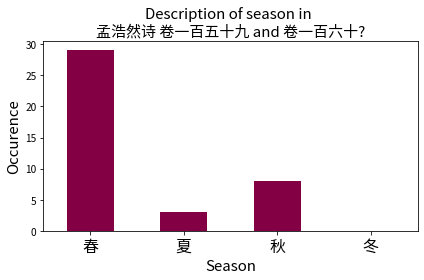

In [53]:
# plot empty figure
plt.figure(figsize=(18,6))

# bar chart
season.plot.bar(rot=0, color="#830045")

# labels and title
plt.xlabel("Season", fontsize=15)
plt.ylabel("Occurence", fontsize=15)
plt.title("Description of season in \n孟浩然诗 卷一百五十九 and 卷一百六十?", fontsize=15)

# remove legend and add keywords in the x-axis
ax = plt.gca()
ax.set_xticklabels(['春','夏','秋','冬'], fontsize=16)
ax.get_legend().remove()

# adjust spacing in plot
plt.tight_layout()

<br>
<br>

***

## **Additional information**

This notebook is provided for educational purpose and feel free to report any issue on GitHub.

<br>

**Author:** [Ka Hei, Chow](https://www.linkedin.com/in/ka-hei-chow-231345188/)

**License:** The code in this notebook is licensed under the [Creative Commons by Attribution 4.0 license](https://creativecommons.org/licenses/by/4.0/).

**Last modified:** December 2021

<br>

***

<br>

## **References:** 
[Jieba](https://levelup.gitconnected.com/how-to-improve-the-performance-of-chinese-text-tokenization-in-python-and-jieba-26add53f3756)

[Displaying Chinese characters](https://colab.research.google.com/github/willismax/matplotlib_show_chinese_in_colab/blob/master/matplotlib_show_chinese_in_colab.ipynb#scrollTo=RfR0uymWF3cB)

[Python Data Science Handbook](https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/03.10-Working-With-Strings.ipynb#scrollTo=DrCMZr3rJsfU)